<a href="https://colab.research.google.com/github/VictorMadu/Coursera-Deep-Learning-Specialization-Course/blob/master/How-to-win-a-data-science-competition/Week4/catboost_notebook_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CatBoost basics

For this homework will use dataset Amazon Employee Access Challenge from [Kaggle](https://www.kaggle.com) competition for our experiments. Data can be downloaded [here](https://www.kaggle.com/c/amazon-employee-access-challenge/data).

As a result of this tutorial you need to provide a tsv file with answers.
There are 17 questions in this tutorial. The resulting tsv file should consist of 17 lines, each line should contain the number of the question, an answer to it and a tab separater between them. Questions are numbered from 1 to 17.
See an example of the resulting file here.

## Reading the data

Let's first download the data and put it to folder `amazon`. Now we will read this data from file.

**visit [Brandon Github Solution](https://github.com/Brandon-HY-Lin/coursera_How-to-Win-a-Data-Science-Competition-Learn-from-Top-Kagglers/blob/master/Programming%20assignment%2C%20week%204_%20CatBoost/catboost_notebook_v2.ipynb)** for solution

In [ ]:
! pip install catboost==0.16

In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
import catboost
from catboost import datasets
from catboost import *

from grader_v2 import Grader

In [ ]:
train_df, test_df = catboost.datasets.amazon()
train_df.head()

ACTION  RESOURCE  MGR_ID  ...  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE
0       1     39353   85475  ...            117906       290919     117908
1       1     17183    1540  ...            118536       308574     118539
2       1     36724   14457  ...            267952        19721     117880
3       1     36135    5396  ...            240983       290919     118322
4       1     42680    5905  ...            123932        19793     119325

[5 rows x 10 columns]

In [ ]:
grader = Grader()

## Preparing your data

Label values extraction

In [ ]:
y = train_df.ACTION
X = train_df.drop('ACTION', axis=1)

Categorical features declaration

In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


Now it makes sense to ananyze the dataset.
First you need to calculate how many positive and negative objects are present in the train dataset.

**Question 1:**

How many negative objects are present in the train dataset X?

In [ ]:
zero_count = 0
grader.submit_tag('negative_samples', zero_count)

Current answer for task negative_samples is: 0


**Question 2:**

How many positive objects are present in the train dataset X?

In [ ]:
one_count = 0
grader.submit_tag('positive_samples', one_count)

Current answer for task positive_samples is: 0


In [ ]:
print('Zero count = ' + str(zero_count) + ', One count = ' + str(one_count))

Zero count = 0, One count = 0


Now for every feature you need to calculate number of unique values of this feature.

**Question 3:**
    
How many unique values has feature RESOURCE?

In [ ]:
unique_vals_for_RESOURCE = 0
grader.submit_tag('resource_unique_values', unique_vals_for_RESOURCE)

Current answer for task resource_unique_values is: 0


Now we can create a Pool object. This type is used for datasets in CatBoost. You can also use numpy array or dataframe. Working with Pool class is the most efficient way in terms of memory and speed. We recommend to create Pool from file in case if you have your data on disk or from FeaturesData if you use numpy.

In [ ]:
import numpy as np
from catboost import Pool

pool1 = Pool(data=X, label=y, cat_features=cat_features)
# pool2 = Pool(data='/opt/conda/lib/python3.6/site-packages/catboost/cached_datasets/amazon/train.csv', delimiter=',', has_header=True)
pool3 = Pool(data=X, cat_features=cat_features)

# print('Dataset shape')
# print('dataset 1:' + str(pool1.shape) + '\ndataset 2:' + str(pool2.shape)  + '\ndataset 3:' + str(pool3.shape))

print('\n')
print('Column names')
print('dataset 1: ')
print(pool1.get_feature_names()) 
print('\ndataset 2:')
# print(pool2.get_feature_names())
print('\ndataset 3:')
print(pool3.get_feature_names())



Column names
dataset 1: 
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 2:

dataset 3:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


## Split your data into train and validation

When you will be training your model, you will have to detect overfitting and select best parameters. To do that you need to have a validation dataset.
Normally you would be using some random split, for example
`train_test_split` from `sklearn.model_selection`.
But for the purpose of this homework the train part will be the first 80% of the data and the evaluation part will be the last 20% of the data.

In [ ]:
train_count = int(X.shape[0] * 0.8)

X_train = X.iloc[:train_count,:]
y_train = y[:train_count]
X_validation = X.iloc[train_count:, :]
y_validation = y[train_count:]

## Train your model

Now we will train our first model.

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    random_seed=0,
    learning_rate=0.1
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent'
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Model is fitted: True
Model params:
{'random_seed': 0, 'learning_rate': 0.1, 'iterations': 5}


## Stdout of the training

You can see in stdout values of the loss function on each iteration, or on each k-th iteration.
You can also see how much time passed since the start of the training and how much time is left.

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=15,
    verbose=3
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.5
0:	learn: 0.3963217	test: 0.3986149	best: 0.3986149 (0)	total: 12.2ms	remaining: 170ms
3:	learn: 0.2239498	test: 0.2270626	best: 0.2270626 (3)	total: 64.1ms	remaining: 176ms
6:	learn: 0.1836195	test: 0.1740682	best: 0.1740682 (6)	total: 151ms	remaining: 172ms
9:	learn: 0.1756833	test: 0.1651515	best: 0.1651515 (9)	total: 225ms	remaining: 113ms
12:	learn: 0.1718746	test: 0.1616576	best: 0.1616576 (12)	total: 296ms	remaining: 45.5ms
14:	learn: 0.1711897	test: 0.1609785	best: 0.1609785 (14)	total: 345ms	remaining: 0us

bestTest = 0.1609784916
bestIteration = 14



## Random seed

If you don't specify random_seed then random seed will be set to a new value each time.
After the training has finished you can look on the value of the random seed that was set.
If you train again with this random_seed, you will get the same results.

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.5
0:	learn: 0.3963217	test: 0.3986149	best: 0.3986149 (0)	total: 15.1ms	remaining: 60.3ms
1:	learn: 0.2934864	test: 0.2972563	best: 0.2972563 (1)	total: 29.6ms	remaining: 44.4ms
2:	learn: 0.2495301	test: 0.2543897	best: 0.2543897 (2)	total: 41ms	remaining: 27.3ms
3:	learn: 0.2239498	test: 0.2270626	best: 0.2270626 (3)	total: 66.2ms	remaining: 16.5ms
4:	learn: 0.2003572	test: 0.1949459	best: 0.1949459 (4)	total: 94.6ms	remaining: 0us

bestTest = 0.1949458708
bestIteration = 4



In [ ]:
random_seed = model.random_seed_
print('Used random seed = ' + str(random_seed))
model = CatBoostClassifier(
    iterations=5,
    random_seed=random_seed
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Used random seed = 0
Learning rate set to 0.5
0:	learn: 0.3963217	test: 0.3986149	best: 0.3986149 (0)	total: 14.3ms	remaining: 57ms
1:	learn: 0.2934864	test: 0.2972563	best: 0.2972563 (1)	total: 27ms	remaining: 40.5ms
2:	learn: 0.2495301	test: 0.2543897	best: 0.2543897 (2)	total: 39.2ms	remaining: 26.1ms
3:	learn: 0.2239498	test: 0.2270626	best: 0.2270626 (3)	total: 64.6ms	remaining: 16.1ms
4:	learn: 0.2003572	test: 0.1949459	best: 0.1949459 (4)	total: 92.8ms	remaining: 0us

bestTest = 0.1949458708
bestIteration = 4



Try training 10 models with parameters and calculate mean and the standart deviation of Logloss error on validation dataset.

**Question 4:**

What is the mean value of the Logloss metric on validation dataset (X_validation, y_validation) after 10 times training `CatBoostClassifier` with different random seeds in the following way:

`model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    random_seed={my_random_seed}
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)
`

In [ ]:
mean = 0 
grader.submit_tag('logloss_mean', mean)

Current answer for task logloss_mean is: 0


**Question 5:**

What is the standard deviation of it?

In [ ]:
stddev = 0
grader.submit_tag('logloss_std', stddev)

Current answer for task logloss_std is: 0


## Metrics calculation and graph plotting

When experimenting with Jupyter notebook you can see graphs of different errors during training.
To do that you need to use `plot=True` parameter.

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.1,
    custom_loss=['Accuracy']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Question 6:**

What is the value of the accuracy metric value on evaluation dataset after training with parameters `iterations=50`, `random_seed=63`, `learning_rate=0.1`?

In [ ]:
accuracy = 0
grader.submit_tag('accuracy_6', accuracy)

Current answer for task accuracy_6 is: 0


## Model comparison

In [ ]:
model1 = CatBoostClassifier(
    learning_rate=0.5,
    iterations=1000,
    random_seed=64,
    train_dir='learning_rate_0.5',
    custom_loss = ['Accuracy']
)

model2 = CatBoostClassifier(
    learning_rate=0.05,
    iterations=1000,
    random_seed=64,
    train_dir='learning_rate_0.05',
    custom_loss = ['Accuracy']
)
model1.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=100
)
model2.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=100
)

0:	learn: 0.3008424	test: 0.3044688	best: 0.3044688 (0)	total: 75.2ms	remaining: 1m 15s
100:	learn: 0.1457039	test: 0.1455429	best: 0.1446840 (79)	total: 15.9s	remaining: 2m 21s
200:	learn: 0.1353339	test: 0.1467367	best: 0.1446840 (79)	total: 32.6s	remaining: 2m 9s
300:	learn: 0.1290011	test: 0.1482575	best: 0.1446840 (79)	total: 48.6s	remaining: 1m 52s
400:	learn: 0.1218594	test: 0.1505287	best: 0.1446840 (79)	total: 1m 4s	remaining: 1m 36s
500:	learn: 0.1187713	test: 0.1517520	best: 0.1446840 (79)	total: 1m 19s	remaining: 1m 19s
600:	learn: 0.1149840	test: 0.1536360	best: 0.1446840 (79)	total: 1m 35s	remaining: 1m 3s
700:	learn: 0.1108584	test: 0.1558047	best: 0.1446840 (79)	total: 1m 50s	remaining: 47.1s
800:	learn: 0.1076911	test: 0.1569796	best: 0.1446840 (79)	total: 2m 6s	remaining: 31.4s
900:	learn: 0.1044518	test: 0.1578600	best: 0.1446840 (79)	total: 2m 22s	remaining: 15.6s
999:	learn: 0.1008985	test: 0.1598084	best: 0.1446840 (79)	total: 2m 37s	remaining: 0us

bestTest = 0.1

In [ ]:
from catboost import MetricVisualizer
MetricVisualizer(['learning_rate_0.05', 'learning_rate_0.5']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Question 7:**

Try training these models for 1000 iterations. Which model will give better best resulting Accuracy on validation dataset?
By best resulting accuracy we mean accuracy on best iteration, which might be not the last iteration.

In [ ]:
best_model_name =  'learning_rate_0.05' # one of 'learning_rate_0.5', 'learning_rate_0.05'
grader.submit_tag('best_model_name', best_model_name)

Current answer for task best_model_name is: learning_rate_0.05


## Best iteration

If a validation dataset is present then after training, the model is shrinked to a number of trees when it got best evaluation metric value on validation dataset.
By default evaluation metric is the optimized metric. But you can set evaluation metric to some other metric.
In the example below evaluation metric is `Accuracy`.

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
    eval_metric='Accuracy'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print('Tree count: ' + str(model.tree_count_))

Tree count: 13


If you don't want the model to be shrinked, you can set `use_best_model=False`

In [ ]:
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
    eval_metric='Accuracy',
    use_best_model=False
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Question 8:**
    
What will be the number of trees in the resulting model after training with validation dataset with parameters `iterations=100`, ` learning_rate=0.5`, `eval_metric='Accuracy'` and with parameter `use_best_model=False`

In [ ]:
tree_count = 0
grader.submit_tag('num_trees', tree_count)

Current answer for task num_trees is: 0


## Cross-validation

The next functionality you need to know about is cross-validation.
For unbalanced datasets stratified cross-validation can be useful.

In [ ]:
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 80
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    inverted=False,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Cross-validation returns specified metric values on every iteration (or every k-th iteration, if you specify so)

In [ ]:
print(cv_data[0:4])

   iterations  test-Logloss-mean  ...  test-AUC-mean  test-AUC-std
0           0           0.300695  ...       0.539535      0.005601
1           1           0.230006  ...       0.616561      0.029454
2           2           0.190709  ...       0.790805      0.026830
3           3           0.181177  ...       0.800386      0.029990

[4 rows x 7 columns]


Let's look on mean value and standard deviation of Logloss for cv on best iteration.

In [ ]:
best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 0.1605±0.0023 on step 49


**Question 9:**

Try running stratified cross-validation with the same parameters. What will be mean of Logloss metric on test of the stratified cross-validation on the best iteration?

In [ ]:
mean_on_best_iteration = 0
grader.submit_tag('mean_logloss_cv', mean_on_best_iteration)

Current answer for task mean_logloss_cv is: 0


**Question 10:**

Try running stratified cross-validation with the same parameters. What will be the standard deviation of Logloss metric of the stratified cross-validation on the best iteration?

In [ ]:
std_on_best_iteration = 0
grader.submit_tag('logloss_std_1', std_on_best_iteration)

Current answer for task logloss_std_1 is: 0


## Overfitting detector

A useful feature of the library is overfitting detector.
Let's try training the model with early stopping.

In [ ]:
model_with_early_stop = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    od_type='Iter',
    od_wait=20,
    eval_metric = 'AUC'
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Question 11:**

Now try training the model with the same parameters and with overfitting detector, but with `eval_metric='AUC'`
What will be the number of iterations after which the training will stop?
(Not the number of trees in the resulting model, but the number of iterations that the algorithm will perform befor training).

In [ ]:
iterations_count = 0
grader.submit_tag('iterations_overfitting', iterations_count)

Current answer for task iterations_overfitting is: 0


## Snapshotting

If you train for long time, for example for several hours, you need to save snapshots.
Otherwise if your laptop or your server will reboot, you will loose all the progress.
To do that you need to specify `snapshot_file` parameter.
Try running the code below and interrupting the kernel after short time.
Then try running the same cell again.
The training will start from the iteration when the training was interrupted.
Note that all additional files are written by default into `catboost_info` directory. It can be changed using `train_dir` parameter. So the snapshot file will be there.

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=40,
    save_snapshot=True,
    snapshot_file='snapshot.bkp',
    random_seed=43
)
model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    logging_level='Verbose'
)

Learning rate set to 0.436031

bestTest = 0.1579789314
bestIteration = 39



## Model predictions

There are multiple ways to do predictions.
The easiest one is to call predict or predict_proba.
You also can make predictions using C++ code. For that see [documentation](https://tech.yandex.com/catboost/doc/dg/concepts/c-plus-plus-api-docpage/).

In [ ]:
print(model.predict_proba(data=X_validation))

[[0.0086 0.9914]
 [0.0134 0.9866]
 [0.0141 0.9859]
 ...
 [0.01   0.99  ]
 [0.2801 0.7199]
 [0.032  0.968 ]]


In [ ]:
print(model.predict(data=X_validation))

[1. 1. 1. ... 1. 1. 1.]


For binary classification resulting value is not necessary a value in `[0,1]`. It is some numeric value. To get the probability out of this value you need to calculate sigmoid of that value.

In [ ]:
raw_pred = model.predict(data=X_validation, prediction_type='RawFormulaVal')
print(raw_pred)

[4.7527 4.3011 4.2463 ... 4.5979 0.9439 3.4095]


In [ ]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
probabilities = [sigmoid(x) for x in raw_pred]
print(np.array(probabilities))

[0.9914 0.9866 0.9859 ... 0.99   0.7199 0.968 ]


## Staged prediction

CatBoost also supports staged prediction - when you want to have a prediction on each object on each iteration (or on each k-th iteration). This can be used if you want to calculate the values of some custom metric using the predictions.

In [ ]:
predictions_gen = model.staged_predict_proba(data=X_validation, ntree_start=0, ntree_end=5, eval_period=1)
for iteration, predictions in enumerate(predictions_gen):
    print('Iteration ' + str(iteration) + ', predictions:')
    print(predictions)

Iteration 0, predictions:
[[0.316 0.684]
 [0.316 0.684]
 [0.316 0.684]
 ...
 [0.316 0.684]
 [0.316 0.684]
 [0.316 0.684]]
Iteration 1, predictions:
[[0.2134 0.7866]
 [0.2134 0.7866]
 [0.2134 0.7866]
 ...
 [0.2134 0.7866]
 [0.2414 0.7586]
 [0.2134 0.7866]]
Iteration 2, predictions:
[[0.1482 0.8518]
 [0.1629 0.8371]
 [0.1482 0.8518]
 ...
 [0.1482 0.8518]
 [0.1976 0.8024]
 [0.1629 0.8371]]
Iteration 3, predictions:
[[0.1052 0.8948]
 [0.1163 0.8837]
 [0.1208 0.8792]
 ...
 [0.1052 0.8948]
 [0.1919 0.8081]
 [0.1332 0.8668]]
Iteration 4, predictions:
[[0.0837 0.9163]
 [0.0859 0.9141]
 [0.1045 0.8955]
 ...
 [0.0738 0.9262]
 [0.1819 0.8181]
 [0.1258 0.8742]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: generator 'CatBoost._staged_predict' raised StopIteration
  


## Metric evaluation on a new dataset

You can also calculate metrics directly after training.

In [ ]:
metrics = model.eval_metrics(data=pool1, metrics=['Logloss','AUC'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print('AUC values:')
print(np.array(metrics['AUC']))

AUC values:
[0.5052 0.5611 0.643  0.7491 0.7845 0.8522 0.8732 0.9155 0.9173 0.9222
 0.9314 0.9393 0.9411 0.9427 0.9427 0.9434 0.9435 0.9437 0.9446 0.9446
 0.9445 0.9439 0.9454 0.9456 0.9455 0.9456 0.9456 0.9459 0.946  0.946
 0.9471 0.9472 0.9473 0.9473 0.9475 0.9474 0.9474 0.9471 0.9472 0.9472]


**Question 12:**

Now train a model in the following way:

`
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    random_seed=43
)
model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    logging_level='Verbose'
)
`

What will be the AUC value on 550 iteration if evaluation metrics on the initial X dataset?

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    random_seed=43
)
model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    logging_level='Verbose'
)

0:	learn: 0.6335962	test: 0.6340206	best: 0.6340206 (0)	total: 105ms	remaining: 1m 44s
1:	learn: 0.5800784	test: 0.5804728	best: 0.5804728 (1)	total: 229ms	remaining: 1m 54s
2:	learn: 0.5348017	test: 0.5355652	best: 0.5355652 (2)	total: 411ms	remaining: 2m 16s
3:	learn: 0.4948441	test: 0.4962757	best: 0.4962757 (3)	total: 530ms	remaining: 2m 11s
4:	learn: 0.4596700	test: 0.4614066	best: 0.4614066 (4)	total: 647ms	remaining: 2m 8s
5:	learn: 0.4291247	test: 0.4309207	best: 0.4309207 (5)	total: 812ms	remaining: 2m 14s
6:	learn: 0.4027804	test: 0.4048004	best: 0.4048004 (6)	total: 943ms	remaining: 2m 13s
7:	learn: 0.3792210	test: 0.3813320	best: 0.3813320 (7)	total: 1.04s	remaining: 2m 9s
8:	learn: 0.3570632	test: 0.3594469	best: 0.3594469 (8)	total: 1.19s	remaining: 2m 10s
9:	learn: 0.3389886	test: 0.3409673	best: 0.3409673 (9)	total: 1.33s	remaining: 2m 11s
10:	learn: 0.3222388	test: 0.3245780	best: 0.3245780 (10)	total: 1.49s	remaining: 2m 14s
11:	learn: 0.3067108	test: 0.3084831	best: 

In [ ]:
auc_value = 0
grader.submit_tag('auc_550', auc_value)

Current answer for task auc_550 is: 0


## Feature importances

Now we will learn how to understand which features are the most important ones. Let's first train the model that will not use feature combinations. To forbid feature combinations you need to use 'max_ctr_complexity=1'. This will speed up the training by a lot, but it will reduce the resulting quality. 

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=300,
    max_ctr_complexity=4,
    random_seed=43
)
model.fit(
    X, y,
    cat_features=cat_features,
    verbose=50
)

Learning rate set to 0.131488
0:	learn: 0.5445688	total: 105ms	remaining: 31.4s
50:	learn: 0.1521733	total: 4.39s	remaining: 21.5s
100:	learn: 0.1438975	total: 9.13s	remaining: 18s
150:	learn: 0.1384154	total: 13.9s	remaining: 13.7s
200:	learn: 0.1338418	total: 18.6s	remaining: 9.19s
250:	learn: 0.1297660	total: 23.4s	remaining: 4.57s
299:	learn: 0.1262548	total: 28.1s	remaining: 0us


Let's see which features are most important for the model without feature combinations.

In [ ]:
importances = model.get_feature_importance(prettified=True)
print(importances)

      Feature Index  Importances
0          RESOURCE    20.418945
1     ROLE_DEPTNAME    18.614487
2            MGR_ID    16.802888
3     ROLE_ROLLUP_2    11.771497
4  ROLE_FAMILY_DESC    10.549426
5         ROLE_CODE     7.848891
6        ROLE_TITLE     5.059334
7     ROLE_ROLLUP_1     4.491845
8       ROLE_FAMILY     4.442687


** Question 13: **

Try training the model without the restriction of combinations, with other parameters set to the same values.
What will be top 3 most important features for this model?

In [ ]:
# top3 = 'MGR_ID,RESOURCE,ROLE_FAMILY_DESC' # You should provide comma separated list of strings. Each string should be in single quotes. All list should be in square brackets.
top3 = 'RESOURCE,ROLE_DEPTNAME,MGR_ID'
grader.submit_tag('feature_importance_top3', top3)

Current answer for task feature_importance_top3 is: RESOURCE,ROLE_DEPTNAME,MGR_ID


## Shap values

Let's train the model one more time.

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=300,
    max_ctr_complexity=1,
    random_seed=43
)
model.fit(
    X, y,
    cat_features=cat_features,
    verbose=50
)

Learning rate set to 0.131488
0:	learn: 0.5443376	total: 68.1ms	remaining: 20.4s
50:	learn: 0.1661963	total: 2.91s	remaining: 14.2s
100:	learn: 0.1596890	total: 5.83s	remaining: 11.5s
150:	learn: 0.1541720	total: 8.69s	remaining: 8.57s
200:	learn: 0.1490273	total: 11.5s	remaining: 5.69s
250:	learn: 0.1453326	total: 14.4s	remaining: 2.81s
299:	learn: 0.1419966	total: 17.2s	remaining: 0us


The library provides a way to understand which features are important for a given object.
Let's take a look on the whole dataset X and analyze the influence of different features on the objects from this dataset.
We will now calculate importances for each object. After that we will visualize these importances.

In [ ]:
pool1 = Pool(data=X, label=y, cat_features=cat_features)
shap_values = model.get_feature_importance(data=pool1, fstr_type='ShapValues', verbose=10000)
print(shap_values.shape)

Processing trees...
128/300 trees processed	passed time: 146ms	remaining time: 197ms
300/300 trees processed	passed time: 362ms	remaining time: 0us
Processing documents...
128/32769 documents processed	passed time: 14ms	remaining time: 3.57s
10112/32769 documents processed	passed time: 1.14s	remaining time: 2.55s
20096/32769 documents processed	passed time: 2.24s	remaining time: 1.41s
30080/32769 documents processed	passed time: 3.33s	remaining time: 298ms
(32769, 10)


Let's look on the prediction of the model for 0-th object. The raw prediction is not the probability, to calculate probability from raw prediction you need to calculate sigmoid(raw_prediction).

In [ ]:
test_objects = [X.iloc[0:1]]

for obj in test_objects:
    print('Probability of class 1 = {:.4f}'.format(model.predict_proba(obj)[0][1]))
    print('Formula raw prediction = {:.4f}'.format(model.predict(obj, prediction_type='RawFormulaVal')[0]))
    print('\n')

Probability of class 1 = 0.9928
Formula raw prediction = 4.9255




Sum of all shap values are equal to the resulting raw formula predition.
We can see on the graph that will be output below that there is a base value, which is equal for all the objects.
And almost all the feature have positive influence on this object. The biggest step to the right is because of the feature called 'MGR_ID'.

In [ ]:
! pip install shap==0.19.1

In [ ]:
import shap
shap.initjs()
shap.force_plot(shap_values[0,:], X.iloc[0,:])

** Question 14: **

What is the most important feature for 91-th object

In [ ]:
most_important_feature = 'FEATURE_NAME'
grader.submit_tag('most_important', most_important_feature)

Current answer for task most_important is: FEATURE_NAME


** Question 15: **

Does it have positive or negative influence? Answer 1 if positive and -1 if negative.

In [ ]:
influence_sign = 0
grader.submit_tag('shap_influence', influence_sign)

Current answer for task shap_influence is: 0


You can also view aggregated information about the influences on the whole dataset.

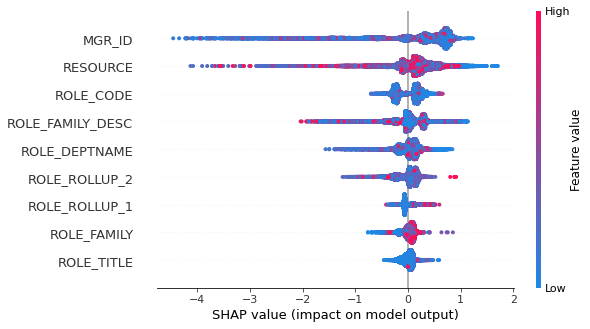

In [ ]:
shap.summary_plot(shap_values, X)

From this graph you can see that values of MGR_ID and RESOURCE features have a large negative impact for many objects.
You can also see that RESOURCE has largest positive impact for many objects.

## Saving the model

You can save your model as a binary file. It is also possible to save the model as Python or C++ code.
If you save the model as a binary file you can then look on the parameters with which the model was trained, including learning_rate and random_seed that are set automatically if you don't specify them.

In [ ]:
my_best_model = CatBoostClassifier(iterations=10)
my_best_model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
my_best_model.save_model('catboost_model.bin')

In [ ]:
my_best_model.load_model('catboost_model.bin')
print(my_best_model.get_params())
print(my_best_model.random_seed_)
print(my_best_model.learning_rate_)

{'iterations': 10, 'loss_function': 'Logloss', 'logging_level': 'Silent', 'verbose': 0}
0
0.5


## Hyperparameter tunning

You can tune the parameters to get better speed or better quality.
Here is the list of parameters that are important for speed and accuracy.

### Training speed

Here is the list of parameters that are important for speeding up the training.
Note that changing this parameters might decrease the quality.
1. iterations + learning rate
By default we train for 1000 iterations. You can decrease this number, but if you decrease the number of iterations you need to increase learning rate so that the process converges. We set learning rate by default dependent on number of iterations and on your dataset, so you might just use default learning rate. But if you want to tune it, you need to know - the more iterations you have, the less should be the learning rate.

2. boosting_type
By default we use Ordered boosting for smaller datasets where we want to fight overfitting. This is expensive in terms of computations. You can set boosting_type to Plain to disable this.

3. bootstrap_type
By default we sample weights from exponential distribution. It is faster to use sampling from Bernoulli distribution. To enable that use bootstrap_type='Bernoulli' + subsample={some value < 1}

4. one_hot_max_size
By default we use one-hot encoding only for categorical features with little amount of different values. For all other categorical features we calculate statistics. This is expensive, and one-hot encoding is cheep. So you can speed up the training by setting one_hot_max_size to some bigger value

5. rsm
This parameter is very important, because it speeds up the training and does not affect the quality. So you should definitely use it, but only in case if you have hundreds of features.
If you have little amount of features it's better not to use this parameter.
If you have many features then the rule is the following: you decrease rsm, for example, you set rsm=0.1. With this rsm value the training needs more iterations to converge. Usually you need about 20% more iterations. But each iteration will be 10x faster. So the resulting training time will be faster even though you will have more trees in the resulting model.

6. leaf_estimation_iterations
This parameter is responsible for calculating leaf values after you have already selected tree structure.
If you have little amount of features, for example 8 or 10 features, then this place starts to be the bottle-neck.
Default value for this parameter depends on the training objective, you can try setting it to 1 or 5, and if you have little amount of features, this might speed up the training.

7. max_ctr_complexity
By default catboost generates categorical feature combinations in a greedy way.
This is time consuming, you can disable that by setting max_ctr_complexity=1 or by allowing only combinations of 2 features by setting max_ctr_complexity=2.
This will speed up the training only if you have categorical features.

8. If you are training the model on GPU, you can try decreasing border_count. This is the number of splits considered for each feature. By default it's set to 128, but you can try setting it to 32. In many cases it will not degrade the quality of the model and will speed up the training by a lot. 

In [ ]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,
    border_count=32)

fast_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

** Question 16: **

Try tunning the speed of the algorithm. What is the maximum speedup you could get by changing these parameters without decreasing of AUC on best iteration on eval dataset compared to AUC on best iteration after training with default parameters and random seed = 0?
The answer shoud be a number, for example 2.7 means you got 2.7 times speedup.

In [ ]:
speedup = 0
grader.submit_tag('speedup', speedup)

Current answer for task speedup is: 0


### Accuracy

The parameters listed below are important to get the best quality of the model. Try changing this parameters to improve the quality of the resulting model

In [ ]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton',
    depth=6
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    logging_level='Silent',
    eval_set=(X_validation, y_validation),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

** Question 17: **

Try tunning these parameters to make AUC on eval dataset as large as possible. What is the maximum AUC value you have reached?

In [ ]:
final_auc = 0
grader.submit_tag('final_auc', final_auc)

Current answer for task final_auc is: 0


In [ ]:
STUDENT_EMAIL = "ebube.madu.243204@unn.edu.ng"
STUDENT_TOKEN = "4ZZJxIbDacg01juI"
grader.status()

In [ ]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!
